In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

<br>
<br>

#### 1. (붓꽃 데이터) 데이터 읽어들이기 

In [2]:
iris = datasets.load_iris()

<br>
<br>

#### 2. Feature 선택하기

In [3]:
# prepare data
x = iris.data[:, :2] # 모든 행, 앞에서 두번째 열까지
y = iris.target

In [4]:
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<br>
<br>

#### 3. 비어있는 모델 객체 만들기

In [6]:
model = neighbors.KNeighborsClassifier(6) # K-Neighbors & 클러스터 분류 (Classifier)

<br>
<br>

#### 4. 모델 객체 학습시키기

In [7]:
model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

<br>
<br>

#### 5. 학습이 끝난 모델 테스트하기 (on test data)

In [8]:
model.predict([[9, 2.5], [3.5, 11]]) # Cluster 2, Cluster 0

array([2, 0])

<br>
<br>

#### 6. 모델 시각화 (중요 X, n_clusters = 1 or 30)

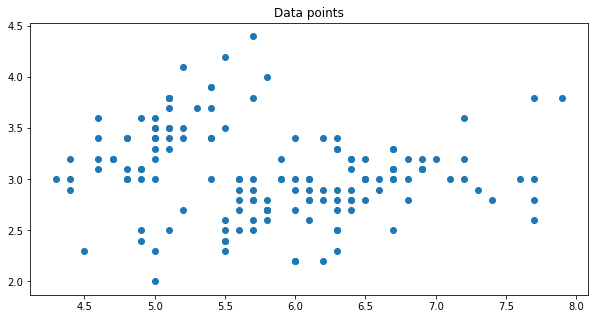

In [9]:
# 실제 데이터 살펴보기
plt.figure(figsize=(10,5))
plt.scatter(x[:, 0], x[:, 1])
plt.title("Data points")
plt.show()

In [10]:
model = neighbors.KNeighborsClassifier(1)
model.fit(x, y)

# 그래프를 그릴 도화지의 x축과 y축의 최대/최소 값을 계산해주기
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

# xx & yy 는 전체 도화지 위의 x & y 좌표 순서쌍이 됩니다.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# XY 좌표계 상의 각각의 Point에 대하여 KNN model 로 class prediction을 진행
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) # xx.shape == (220, 280)

# print(Z)
# print(np.c_[xx.ravel(), yy.ravel()])

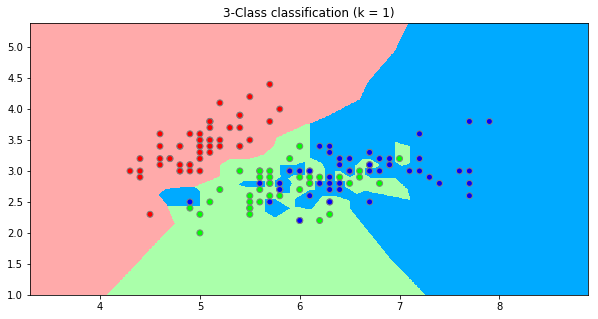

In [11]:
# 도화지 위에 칠해줄 색상을 지정합니다
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF']) # x & y 좌표계 각 포인트
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF']) # 실제 데이터

# 도화지 위의 x & y 좌표 각각에 대해 Cluster를 Predict한 결과를 그려줍니다.
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 도화지 위의 실제 데이터 각각에 대해 색상을 칠해서 표현해줍니다.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolors='gray')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 1)")
plt.show()

# ListedColormap, meshgrid, pcolormesh 등에 대한 설명 자료 : https://goo.gl/s8by1e

#### KNN 의 neighbor 를 30으로 높일 경우 (결정 경계가 부드러워짐)

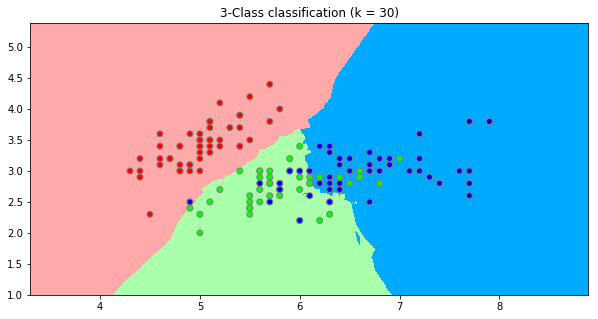

In [12]:
model = neighbors.KNeighborsClassifier(30)
model.fit(x, y)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # XY 좌표계 상의 각각의 Point에 대하여 KNN model 로 class prediction을 진행
Z = Z.reshape(xx.shape) # xx.shape == (220, 280)

plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolors='gray')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 30)")
plt.show()